In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam

/home/pedrotorres/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [47]:
# load dataset
dataframe = pandas.read_csv('GIST/gistdescriptor/csv/gist_features.csv')
dataframe = dataframe[dataframe.movimento != 'express']
# dataframe = dataframe[dataframe.movimento != 'surreal']
# dataset = dataframe.values
# X = dataset[:,0:4].astype(float)
# Y = dataset[:,4]
dataframe.head()

,1,2,3,4,5,6,7,8,9,10,...,504,505,506,507,508,509,510,511,512,movimento
0,0.101180,0.054748,0.069270,0.095228,0.064866,0.083267,0.067420,0.059050,0.058033,0.055041,...,0.047724,0.055458,0.056412,0.062151,0.071972,0.015242,0.031297,0.061239,0.058359,cubismo
1,0.021268,0.047648,0.040860,0.045891,0.024987,0.034874,0.042191,0.043204,0.027459,0.035662,...,0.037346,0.027889,0.027011,0.037306,0.067150,0.027828,0.021334,0.072296,0.084004,cubismo
2,0.012151,0.021379,0.045505,0.034248,0.021808,0.043200,0.043051,0.029428,0.015232,0.027713,...,0.054008,0.030831,0.063981,0.064851,0.043984,0.016595,0.049209,0.043237,0.030625,cubismo
3,0.072982,0.049940,0.064760,0.052289,0.055363,0.090895,0.091935,0.069430,0.045179,0.079079,...,0.079950,0.060040,0.065639,0.089539,0.054537,0.025248,0.024525,0.044841,0.031313,cubismo
4,0.035002,0.027645,0.026887,0.024981,0.053913,0.036880,0.024903,0.025889,0.052311,0.043975,...,0.009137,0.027877,0.020985,0.027115,0.011540,0.034369,0.022454,0.014588,0.010221,cubismo


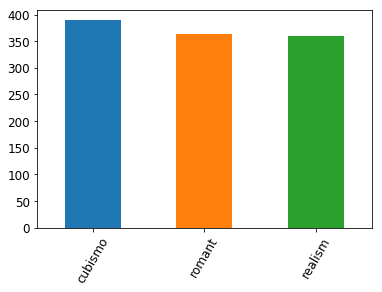

In [48]:
dataframe['movimento'].value_counts().plot(kind='bar', rot=60, fontsize=12)

In [49]:
# dataframe = dataframe[:2048]
X = dataframe.drop(['movimento'], axis=1)
y = dataframe['movimento']

In [50]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
0,0.101180,0.054748,0.069270,0.095228,0.064866,0.083267,0.067420,0.059050,0.058033,0.055041,...,0.047153,0.047724,0.055458,0.056412,0.062151,0.071972,0.015242,0.031297,0.061239,0.058359
1,0.021268,0.047648,0.040860,0.045891,0.024987,0.034874,0.042191,0.043204,0.027459,0.035662,...,0.048983,0.037346,0.027889,0.027011,0.037306,0.067150,0.027828,0.021334,0.072296,0.084004
2,0.012151,0.021379,0.045505,0.034248,0.021808,0.043200,0.043051,0.029428,0.015232,0.027713,...,0.086619,0.054008,0.030831,0.063981,0.064851,0.043984,0.016595,0.049209,0.043237,0.030625
3,0.072982,0.049940,0.064760,0.052289,0.055363,0.090895,0.091935,0.069430,0.045179,0.079079,...,0.088094,0.079950,0.060040,0.065639,0.089539,0.054537,0.025248,0.024525,0.044841,0.031313
4,0.035002,0.027645,0.026887,0.024981,0.053913,0.036880,0.024903,0.025889,0.052311,0.043975,...,0.035694,0.009137,0.027877,0.020985,0.027115,0.011540,0.034369,0.022454,0.014588,0.010221


In [51]:
y.head()

0    cubismo
1    cubismo
2    cubismo
3    cubismo
4    cubismo
Name: movimento, dtype: object

In [52]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [53]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1024, input_dim=512, activation='relu'))
    model.add(Dense(1024, activation='sigmoid'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='tanh', metrics=['accuracy'])
    return model

In [54]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=128, verbose=0)

In [55]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Resultado GIST
* Cubismo - Expressionismo - Romanticismo
    * Baseline: 70.37% (5.49%)
* Cubismo - Realismo - Romanticismo    
    * Baseline: 69.1602% (4.6196%)    

# Resultado LBP
Baseline: 62.48% (5.01%)

# Resultado COLOR

* Cubismo - Expressionismo - Romanticismo
    * Baseline: 68.40% (3.89%)

In [56]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.4f%% (%.4f%%)" % (results.mean()*100, results.std()*100))

Baseline: 69.1602% (4.6196%)
